## MAPF

In [2]:
import os
import numpy as np
from crewai import Agent, Task, Crew

os.environ["OPENAI_API_KEY"] = ""

In [3]:
from environment import Environment
import configs
import pickle

with open('./test_set/{}length_{}agents_{}density.pth'.format(40, 4, 0.3), 'rb') as f:
    tests = pickle.load(f)

directiondict = {
    'Stay': 0, 'North': 1, 'South': 2, 'West': 3, 'East': 4, 'Stay.': 0, 'North.': 1, 'South.': 2, 'West.': 3, 'East.': 4 
}

num_agents = 4

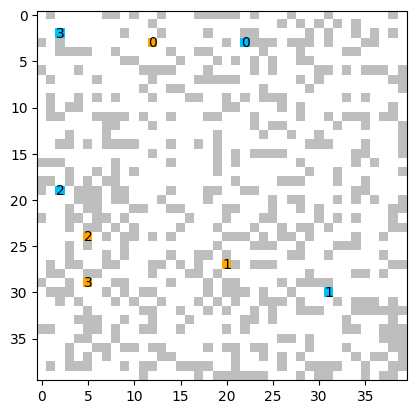

In [4]:
env = Environment()
env.load(tests[0][0], tests[0][1], tests[0][2])
env.render()

In [5]:
class PathFindingAgents():
	def path_finder(self):
		return Agent(
			role='Path finder',
			goal='Start at the start point and reach the end point without crashing into a wall.',
			backstory="""You are a veteran adventurer with a great sense of direction.
			You understand which direction you need to move to get from where you are to where you want to go.
			""",
			verbose=True
		)
	
class PathFindingTasks():
	def path_finding(self, agent, x, y, x_finish, y_finish, east, west, north, south, last_action):
		return Task(
  	description=(f"""
    Your current coordinates are ({x},{y}) and your destination is ({x_finish},{y_finish}).
    East and west in the coordinates correspond to the x axis.
    South and north in the coordinated correspond to the y axis.
    You can only move east, west, south and north.
    You can only make one move at a time.
    {east}
    {west}
    {south}
    {north}
    Which direction do you move next?
    {last_action}
    Answer in one word only: {{DIRECTION}}
    """),
    expected_output='Direction',
    agent=agent
    )



> Entering new CrewAgentExecutor chain...


2024-06-05 14:02:30,893 - 21524 - __init__.py-__init__:518 - WARNING: Overriding of current TracerProvider is not allowed


Given my current coordinates (22,36) and my destination (12,36), I should be heading west. This is also confirmed by the fact that my path to the east is blocked by a wall but a path lies to the west. 

Final Answer: West

> Finished chain.


> Entering new CrewAgentExecutor chain...


2024-06-05 14:02:35,926 - 21524 - __init__.py-__init__:518 - WARNING: Overriding of current TracerProvider is not allowed


Looking at our current coordinates (x=31, y=9), our destination is at (x=20, y=12). Since we desire to move towards the destination, we need to decrease our x-coordinate. As we are currently to the east of our destination, we need to move west to get closer. The north path is blocked by a wall, but that doesn't matter since our destination is not north of our current location. 

Final Answer: West

> Finished chain.


> Entering new CrewAgentExecutor chain...


2024-06-05 14:02:42,050 - 21524 - __init__.py-__init__:518 - WARNING: Overriding of current TracerProvider is not allowed


Considering my current coordinates are (2,20) and my destination is (5,15), I need to move towards east and south, as east is associated with increasing the x-axis and south is associated with decreasing the y-axis. Since I can only move one step at a time, I'll need to decide between moving east or south. As my y-coordinate is far from the destination compared to my x-coordinate, it seems logical to start decreasing the y-coordinate first.

Final Answer: South

> Finished chain.


> Entering new CrewAgentExecutor chain...
Given my current coordinates (2,37) and my destination (5,10), I need to move both east and south. However, my south is blocked by a wall. Therefore, the most logical move would be to head east and try to find another route that will allow me to move southward.

Final Answer: East

> Finished chain.


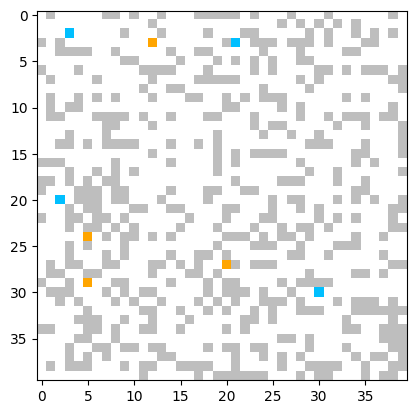

2024-06-05 14:02:47,256 - 21524 - __init__.py-__init__:518 - WARNING: Overriding of current TracerProvider is not allowed




> Entering new CrewAgentExecutor chain...


2024-06-05 14:02:52,797 - 21524 - __init__.py-__init__:518 - WARNING: Overriding of current TracerProvider is not allowed


Since my current coordinates are (21,36) and my destination is (12,36), and the east and west correspond to the x-axis, I need to move west to decrease my x-coordinate. However, the west is blocked by a wall. I can move either north or south, but since there's no information about which one will eventually lead me to the west, I will choose the north path as it's equally possible.

Final Answer: North

> Finished chain.


> Entering new CrewAgentExecutor chain...


2024-06-05 14:02:56,904 - 21524 - __init__.py-__init__:518 - WARNING: Overriding of current TracerProvider is not allowed


Given the current location (30,9), the destination point (20,12), and the conditions provided, I need to move towards the destination. The destination is west (x-axis decreases) and north (y-axis increases) from the current location. However, since north is blocked, the only viable option to get closer to the destination is to move west.

Final Answer: West

> Finished chain.


> Entering new CrewAgentExecutor chain...


2024-06-05 14:03:01,814 - 21524 - __init__.py-__init__:518 - WARNING: Overriding of current TracerProvider is not allowed


Given my current coordinates (2,19) and my destination coordinates (5,15), I need to move both south and east to reach the goal. I came from the north, so to avoid backtracking, I should move either south or east. Since there are no obstacles mentioned in either direction, I can choose either. However, since the vertical distance (4 units) is greater than the horizontal distance (3 units), I should prioritize moving south.

Final Answer: South

> Finished chain.


> Entering new CrewAgentExecutor chain...
Considering my current coordinates are (3,37) and the destination is (5,10), and I can only move east, west, south, and north, it's clear that I need to head south to reduce the y-coordinate and east to increase the x-coordinate. Since I just came from the west, the most logical direction to take next would be South. 

Final Answer: South

> Finished chain.


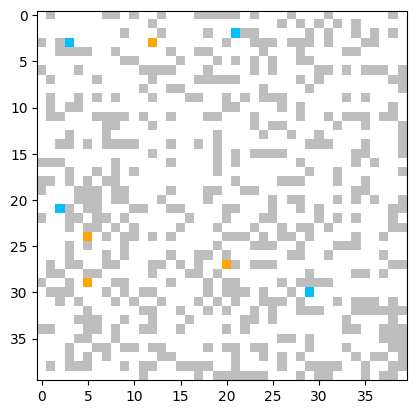

2024-06-05 14:03:06,841 - 21524 - __init__.py-__init__:518 - WARNING: Overriding of current TracerProvider is not allowed




> Entering new CrewAgentExecutor chain...


2024-06-05 14:03:12,144 - 21524 - __init__.py-__init__:518 - WARNING: Overriding of current TracerProvider is not allowed


Given my current coordinates (21,37), my destination is (12,36). This means I need to move west and slightly south to reach my goal. However, the east is blocked, and since I came from the south, moving south again would be counterproductive. Going north would also distance me further from my destination. Thus, the only logical choice is to head west.

Final Answer: West

> Finished chain.


> Entering new CrewAgentExecutor chain...


KeyboardInterrupt: 

In [6]:
# 나중에 코드 간소화

agents = PathFindingAgents()
tasks = PathFindingTasks()

agent0 = agents.path_finder()
agent1 = agents.path_finder()
agent2 = agents.path_finder()
agent3 = agents.path_finder()

action_list0 = []
action_list1 = []
action_list2 = []
action_list3 = []

#10 timesteps
for n in range(10):

  observations = env.observe()

  agents_obs = [observations[0][i][1] for i in range(num_agents)]
  a0_obs = agents_obs[0]
  a1_obs = agents_obs[1]
  a2_obs = agents_obs[2]
  a3_obs = agents_obs[3]

  x_coords = [observations[1][i][1] for i in range(num_agents)]
  y_coords = [39 - observations[1][i][0] for i in range(num_agents)]
  x0, x1, x2, x3 = x_coords
  y0, y1, y2, y3 = y_coords

  x_finish = [tests[0][2][i][1] for i in range(num_agents)]
  y_finish = [39 - tests[0][2][i][0] for i in range(num_agents)]
  x0_finish, x1_finish, x2_finish, x3_finish = x_finish
  y0_finish, y1_finish, y2_finish, y3_finish = y_finish


  if a0_obs[4][3] == 0:
    west0 = """To your west lies a path."""
  else:
    west0 = """Your west is blocked by a wall."""

  if a0_obs[4][5] == 0:
    east0 = """To your east lies a path."""
  else:
    east0 = """Your east is blocked by a wall."""

  if a0_obs[5][4] == 0:
    south0 = """To your south lies a path."""
  else:
    south0 = """Your south is blocked by a wall."""

  if a0_obs[3][4] == 0:
    north0 = """To your north lies a path."""
  else:
    north0 = """Your north is blocked by a wall."""

  if len(action_list0) == 0:
    last_action0 = """"""
  elif action_list0[-1] in ['West', 'West.']:
    last_action0 = f"""You came from east."""
  elif action_list0[-1] in ['East', 'East.']:
    last_action0 = f"""You came from west."""
  elif action_list0[-1] in ['South', 'South.']:
    last_action0 = f"""You came from north."""
  elif action_list0[-1] in ['North', 'North.']:
    last_action0 = f"""You came from south."""
  elif action_list0[-1] in ['Stay', 'Stay.']:
    last_action0 = f"""You paused once for another agent."""
  else:
    last_action0 = """"""


  if a1_obs[4][3] == 0:
    west1 = """To your west lies a path."""
  else:
    west1 = """Your west is blocked by a wall."""

  if a1_obs[4][5] == 0:
    east1 = """To your east lies a path."""
  else:
    east1 = """Your east is blocked by a wall."""

  if a1_obs[5][4] == 0:
    south1 = """To your south lies a path."""
  else:
    south1 = """Your south is blocked by a wall."""

  if a1_obs[3][4] == 0:
    north1 = """To your north lies a path."""
  else:
    north1 = """Your north is blocked by a wall."""

  if len(action_list1) == 0:
    last_action1 = """"""
  elif action_list1[-1] in ['West', 'West.']:
    last_action1 = f"""You came from east."""
  elif action_list1[-1] in ['East', 'East.']:
    last_action1 = f"""You came from west."""
  elif action_list1[-1] in ['South', 'South.']:
    last_action1 = f"""You came from north."""
  elif action_list1[-1] in ['North', 'North.']:
    last_action1 = f"""You came from south."""
  elif action_list1[-1] in ['Stay', 'Stay.']:
    last_action1 = f"""You paused once for another agent."""
  else:
    last_action1 = """"""


  if a2_obs[4][3] == 0:
    west2 = """To your west lies a path."""
  else:
    west2 = """Your west is blocked by a wall."""

  if a2_obs[4][5] == 0:
    east2 = """To your east lies a path."""
  else:
    east2 = """Your east is blocked by a wall."""

  if a2_obs[5][4] == 0:
    south2 = """To your south lies a path."""
  else:
    south2 = """Your south is blocked by a wall."""

  if a2_obs[3][4] == 0:
    north2 = """To your north lies a path."""
  else:
    north2 = """Your north is blocked by a wall."""

  if len(action_list2) == 0:
    last_action2 = """"""
  elif action_list2[-1] in ['West', 'West.']:
    last_action2 = f"""You came from east."""
  elif action_list2[-1] in ['East', 'East.']:
    last_action2 = f"""You came from west."""
  elif action_list2[-1] in ['South', 'South.']:
    last_action2 = f"""You came from north."""
  elif action_list2[-1] in ['North', 'North.']:
    last_action2 = f"""You came from south."""
  elif action_list2[-1] in ['Stay', 'Stay.']:
    last_action2 = f"""You paused once for another agent."""
  else:
    last_action2 = """"""


  if a3_obs[4][3] == 0:
    west3 = """To your west lies a path."""
  else:
    west3 = """Your west is blocked by a wall."""

  if a3_obs[4][5] == 0:
    east3 = """To your east lies a path."""
  else:
    east3 = """Your east is blocked by a wall."""

  if a3_obs[5][4] == 0:
    south3 = """To your south lies a path."""
  else:
    south3 = """Your south is blocked by a wall."""

  if a3_obs[3][4] == 0:
    north3 = """To your north lies a path."""
  else:
    north3 = """Your north is blocked by a wall."""

  if len(action_list3) == 0:
    last_action3 = """"""
  elif action_list3[-1] in ['West', 'West.']:
    last_action3 = f"""You came from east."""
  elif action_list3[-1] in ['East', 'East.']:
    last_action3 = f"""You came from west."""
  elif action_list3[-1] in ['South', 'South.']:
    last_action3 = f"""You came from north."""
  elif action_list3[-1] in ['North', 'North.']:
    last_action3 = f"""You came from south."""
  elif action_list3[-1] in ['Stay', 'Stay.']:
    last_action3 = f"""You paused once for another agent."""
  else:
    last_action3 = """"""
  

  navigation0 = tasks.path_finding(agent0, x0, y0, x0_finish, y0_finish, east0, west0, north0, south0, last_action0)
  navigation1 = tasks.path_finding(agent1, x1, y1, x1_finish, y1_finish, east1, west1, north1, south1, last_action1)
  navigation2 = tasks.path_finding(agent2, x2, y2, x2_finish, y2_finish, east2, west2, north2, south2, last_action2)
  navigation3 = tasks.path_finding(agent3, x3, y3, x3_finish, y3_finish, east3, west3, north3, south3, last_action3)


  crew0 = Crew(
    agents=[agent0],
    tasks=[navigation0],
    verbose=0,
  )

  result0 = crew0.kickoff()

  action_list0.append(result0)

  crew1 = Crew(
    agents=[agent1],
    tasks=[navigation1],
    verbose=0,
  )

  result1 = crew1.kickoff()

  action_list1.append(result1)

  crew2 = Crew(
    agents=[agent2],
    tasks=[navigation2],
    verbose=0,
  )

  result2 = crew2.kickoff()

  action_list2.append(result2)

  crew3 = Crew(
    agents=[agent3],
    tasks=[navigation3],
    verbose=0,
  )

  result3 = crew3.kickoff()

  action_list3.append(result3)


  env.step([directiondict[result0], directiondict[result1], directiondict[result2], directiondict[result3]])
  env.render()